# Analysis 1 (Ronak Jain)

## Research question/interests

### Through this data analysis, we aim to demonstrate the exceptional ability of Stephen Curry and establish his status as the greatest three-point shooter in the history of the sport. To see how good Stephen curry is by comparing his stats with other great three-point shooters such as Ray Allen, Reggie Miller, and Klay Thompson. By doing so, I hope to gain a more comprehensive comprehension of his exceptional abilities and present a thorough, yet succinct, assessment of his overall on-court impact. Throughout this analysis, I will prioritize offering an impartial and objective evaluation of Stephen Curry's skills, while also endeavouring to highlight his distinctive strengths to a wider audience.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('../data/processed/player_per_game_cleaned.csv')
df_totals = pd.read_csv('../data/processed/player_totals_cleaned.csv')
players = ['Stephen Curry', 'Ray Allen', 'Reggie Miller']
df_players = df[df['player_name'].isin(players)]
df_players = df_players[['player_name', 'season', 'points_per_game', 'three_point_percentage']]

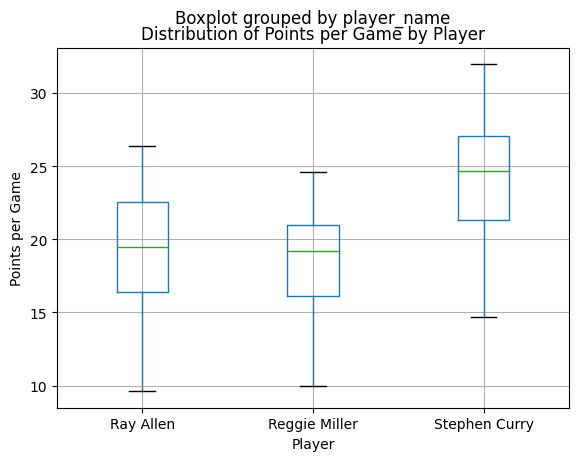

In [19]:
df_players.boxplot(column='points_per_game', by='player_name')
plt.title('Distribution of Points per Game by Player')
plt.ylabel('Points per Game')
plt.xlabel('Player')
plt.show()

### The boxplot shows the distribution of points per game by player. Stephen Curry has the highest median and range of points per game, followed by Ray Allen and then Reggie Miller.

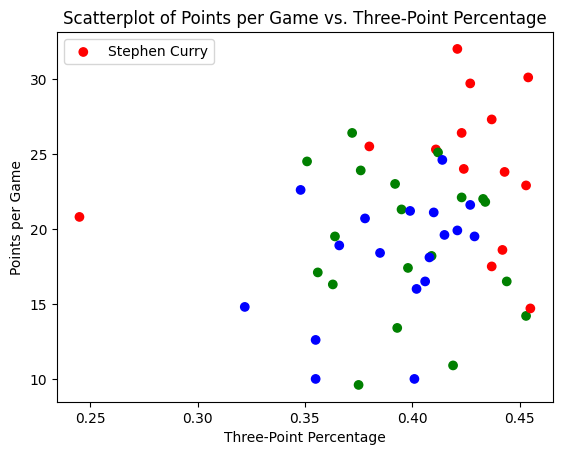

In [20]:
colors = {'Stephen Curry':'red', 'Ray Allen':'green', 'Reggie Miller':'blue'}
plt.scatter(df_players['three_point_percentage'], df_players['points_per_game'], c=df_players['player_name'].apply(lambda x: colors[x]))
plt.title('Scatterplot of Points per Game vs. Three-Point Percentage')
plt.xlabel('Three-Point Percentage')
plt.ylabel('Points per Game')
plt.legend(colors)
plt.show()

### The scatterplot shows a positive correlation between three-point percentage and points per game for all three players, with Stephen Curry having the highest correlation. The colors of the points represent the different players.

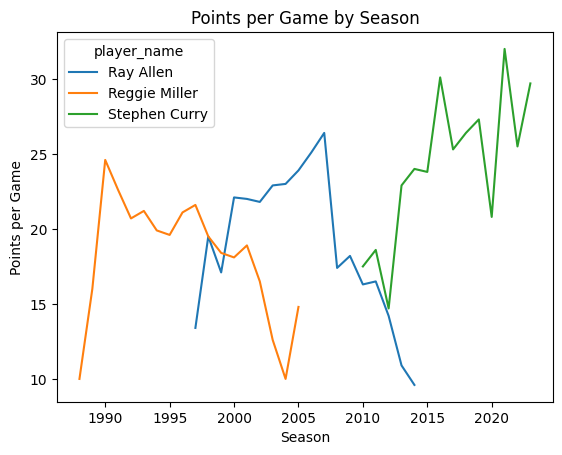

In [21]:
df_players.pivot_table(index='season', columns='player_name', values='points_per_game').plot()
plt.title('Points per Game by Season')
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.show()

### The line chart shows the points per game by season for each player. Stephen Curry's scoring has been increasing over the years, while Ray Allen's scoring has remained relatively constant until the last few years of his career. Reggie Miller's scoring decreased at a stable rate after his peak.

### Overall, these visualizations suggest that Stephen Curry has been the most dominant scorer of the three players, with a strong correlation between his shooting accuracy and scoring and a trend of increasing scoring over time. Ray Allen had a consistent scoring output until the end of his career, while Reggie Miller's scoring decreased steadily after his peak.

In [25]:
advanced_stats = pd.read_csv('../data/processed/advanced_cleaned.csv')

# select relevant columns
selected_cols = ['player_name', 'season', 'mp_per_game', 'per', 'ws_per_48', 'bpm']
curry_cols = advanced_stats.loc[advanced_stats['player_name'] == 'Stephen Curry', selected_cols]
all_time_greats_cols = advanced_stats.loc[advanced_stats['player_name'].isin(['Michael Jordan', 'LeBron James', 'Kobe Bryant']), selected_cols]

# plot comparison
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
labels = ['Stephen Curry', 'Michael Jordan', 'LeBron James', 'Kobe Bryant']

for i, col in enumerate(selected_cols[2:]):
    axs[i].scatter(curry_cols['mp_per_game'], curry_cols[col], label=labels[0])
    axs[i].scatter(all_time_greats_cols['mp_per_game'], all_time_greats_cols[col], label=labels[1:])
    axs[i].set_xlabel('Minutes Played Per Game')
    axs[i].set_ylabel(col.upper())
    axs[i].set_title(f'{col.upper()} vs Minutes Played Per Game')
    axs[i].legend()
    
plt.tight_layout()
plt.show()

KeyError: "['mp_per_game', 'per', 'ws_per_48', 'bpm'] not in index"